In [1]:
import os
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
fn = os.path.join('..', 'data', 'modeling', 'training_MesNet.h5ad')
adata = sc.read_h5ad(fn)

In [3]:
adata

AnnData object with n_obs × n_vars = 140799 × 723
    obs: 'Stages', 'Clusters', 'Type', 'LineageAnnotations', 'celltype', 'trajectory', 'training', 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'plates', 'devtime', 'location', 'total_counts_ERCC', 'pct_counts_ERCC', 'doublet_scores', 'CytoTRACE', 'Gut_neuron', 'Sensory', 'Symp', 'enFib', 'ChC', 'Gut_glia', 'NCC', 'Mesenchyme', 'Melanocytes', 'SatGlia', 'SC', 'BCC', 'conflict', 'assignments', 'Hub', 'Hub_leiden', 'total_counts_ribo', 'pct_counts_ribo', 'T+ Sox2+', 'batch', 'percent_mito', 'n_counts', 'bh_pval', 'region', 'tissue', 'adj_stage', 'adj_sample', 'S_score', 'G2M_score', 'phase', 'leiden_R', 'celltype_original', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.1', 'seurat_clusters', 'age', 'RNA_snn_res.0.5', 'ident', 'velocity_self_transition', 'source', 'weight'
    obsm: 'X_diff', 'X_diffmap', 'X_latent', 'X_pca', 'X_pca_harmony', 'X_umap', 'velocity_umap'


/home/caleb/miniconda3/envs/scanpy/lib/python3.13/site-packages/scanpy/plotting/_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


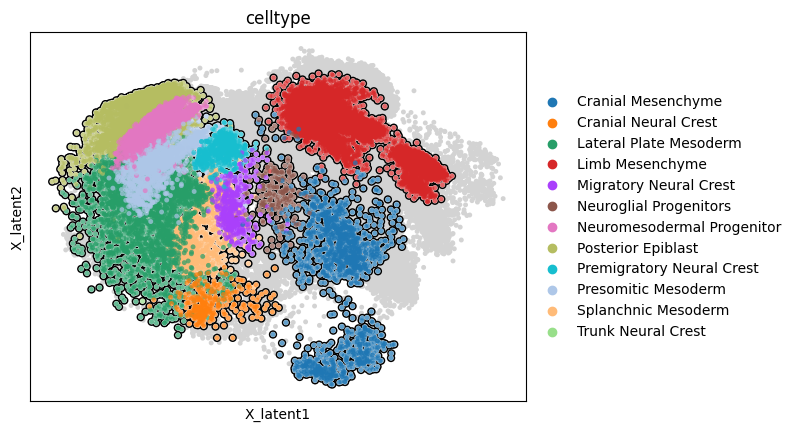

In [4]:
ms = 50
sc.pl.embedding(adata[~adata.obs.trajectory], 'X_latent', size = ms, show = False)
sc.pl.embedding(adata[adata.obs.trajectory], 'X_latent', color = 'celltype', add_outline = True, size = ms, ax = plt.gca())

/home/caleb/miniconda3/envs/scanpy/lib/python3.13/site-packages/scanpy/plotting/_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


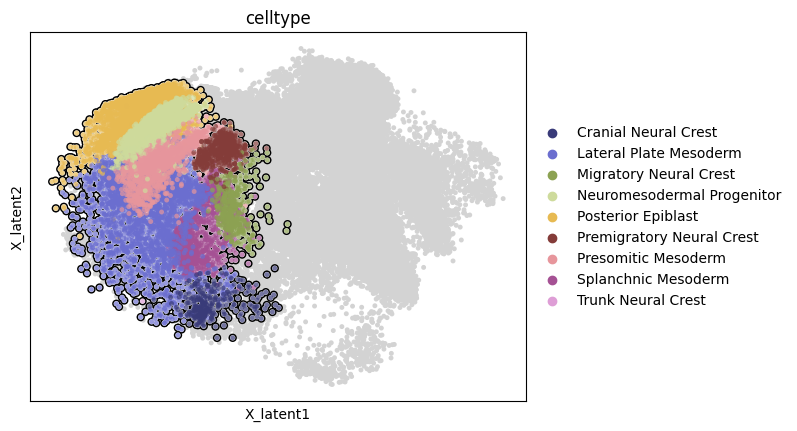

In [5]:
traj_msk = ~adata.obs.celltype.isin(['Limb Mesenchyme', 'Cranial Mesenchyme', 'Neuroglial Progenitors'])
adata.obs['MesNet_trajectory'] = adata.obs.trajectory & traj_msk
sc.pl.embedding(adata[~adata.obs.MesNet_trajectory], 'X_latent', size = ms, show = False)
sc.pl.embedding(adata[adata.obs.MesNet_trajectory], 'X_latent', color = 'celltype',
                palette = 'tab20b', add_outline = True, size = ms, ax = plt.gca())

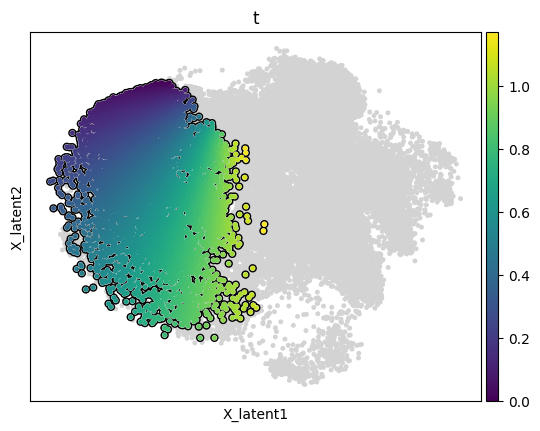

In [6]:
adata.obs['theta'] = np.arctan2(adata.obsm['X_latent'][:, 1], adata.obsm['X_latent'][:, 0])
adata.obs['t'] = 4 * (adata.obs.theta - adata.obs.theta.min()) / (adata.obs.theta.max() - adata.obs.theta.min())
sc.pl.embedding(adata[~adata.obs.MesNet_trajectory], 'X_latent', size = ms, show = False)
sc.pl.embedding(adata[adata.obs.MesNet_trajectory], 'X_latent', color = 't',
                alpha = 1, add_outline = True, size = ms, ax = plt.gca())

In [ ]:
# data = adata.layers['MesNet']
# t = adata.obs.t.values
# msk = adata.obs.MesNet_trajectory
# raw_data = adata[msk].X.toarray()
# msk_expr = (raw_data > 0).mean(0) > .1
# msk_cv = (raw_data[:, msk_expr].std(0) / raw_data[:, msk_expr].mean(0)) > 1
# data = data[msk]; t = t[msk]
# data = data[:, msk_expr][:, msk_cv]
# ix = t.argsort()
# data = data[ix]; t = t[ix]
# w_sm = int(data.shape[0] / 10)
# kernel = np.ones(w_sm) / w_sm
# data_sm = np.apply_along_axis(np.convolve, 0, data, v = kernel, mode = 'valid')
# ix_var = data_sm.argmax(0).argsort()
# data = data[:, ix_var]
# data = (data - data.min(0)[None, :]) / (data.max(0)[None, :] - data.min(0)[None, :])
# plt.imshow(data.T, cmap = 'seismic', aspect = 60)
# plt.show()